Bank Customer Churn Prediction

Importing Required Librarys
To import important libraries in Python, you would typically use the import statement for the libraries you need.

In [1]:
import pandas as pd   # For working with data frames and data analysis
import numpy as np    # For numerical computing with arrays and matrices

In [2]:
import scipy          # For scientific and technical computing
import sympy          # For symbolic mathematics

In [3]:
import matplotlib.pyplot as plt  # For static plotting and visualizations
import seaborn as sns          # For statistical data visualizations


In [4]:
import sklearn       # For machine learning algorithms and tools
#import tensorflow as tf  # For deep learning frameworks
#from tensorflow import keras  # For building neural networks
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px

In [6]:
import xgboost as xgb

In [7]:
import requests      # For making HTTP requests to interact with APIs
from bs4 import BeautifulSoup  # For scraping web data
import flask         # For web application development (lightweight framework)

In [8]:
import os            # For interacting with the operating system, files, and directories
import json          # For working with JSON data
import csv           # For working with CSV files

In [9]:
import pandas as pd
Data = pd.read_csv(
   # "C:/Users/Ali Elsawwaf/depi/project/Bank_Customer_Churn_Prediction.csv"
    "Bank_Customer_Churn_Prediction.csv"
)

Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
Data.shape

(10000, 14)

In [11]:
# Investigate all the elements whithin each Feature

for column in Data:
    unique_vals = np.unique(Data[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


In [12]:
# print the names of the features and label (`Exited`)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# Checking for null values
Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# Drop RowNumber column
Data = Data.drop(columns=['RowNumber'])

In [15]:
# Check for duplicates
duplicates = Data.duplicated().sum()
duplicates

np.int64(0)

In [16]:
# Drop CustomerId, Surname columns
Data = Data.drop(columns=['CustomerId', 'Surname'])

In [17]:
# Check for duplicates
duplicates = Data.duplicated().sum()
duplicates

np.int64(0)

In [18]:
# Investigate all the elements whithin each Feature

for column in Data:
    unique_vals = np.unique(Data[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


In [20]:
#outlier checking
# Remove non-numeric columns for outlier detection
numerical_columns = Data.select_dtypes(include=[ 'float64', 'int64']).columns

# Calculate IQR for numerical columns
Q1 = Data[numerical_columns].quantile(0.25)
Q3 = Data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outlier
outliers = ((Data[numerical_columns] < lower_bound) | (Data[numerical_columns] > upper_bound)).sum()
outliers

CreditScore          15
Age                 359
Tenure                0
Balance               0
NumOfProducts        60
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited             2037
dtype: int64

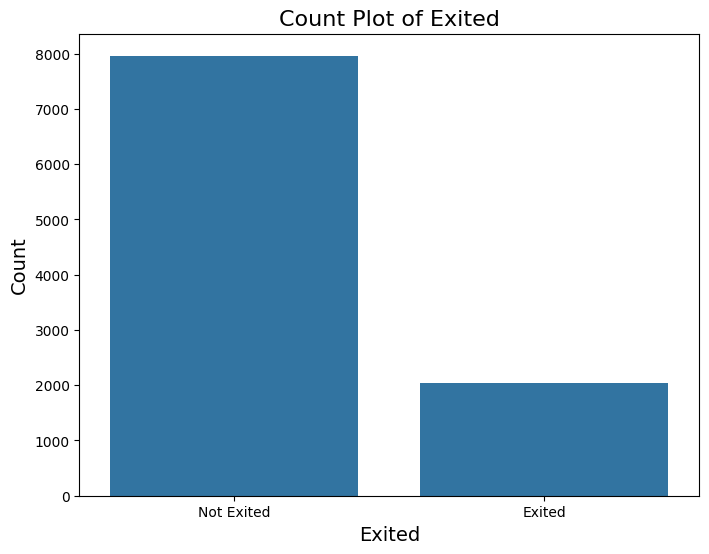

In [21]:
# Count Plot of our Y - Check the balance of the dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=Data, x="Exited")
plt.title("Count Plot of Exited", fontsize=16)
plt.xlabel("Exited", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], labels=["Not Exited", "Exited"])
plt.show()

In [22]:
# Drop non-numeric columns for correlation calculation
#Data = Data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Calculate correlation matrix
#correlation_matrix = Data.corr()
#correlation_matrix

In [23]:
Data.shape

(10000, 11)

In [24]:
# Display the first 5 rows of the DataFrame after dropping non-numeric columns
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


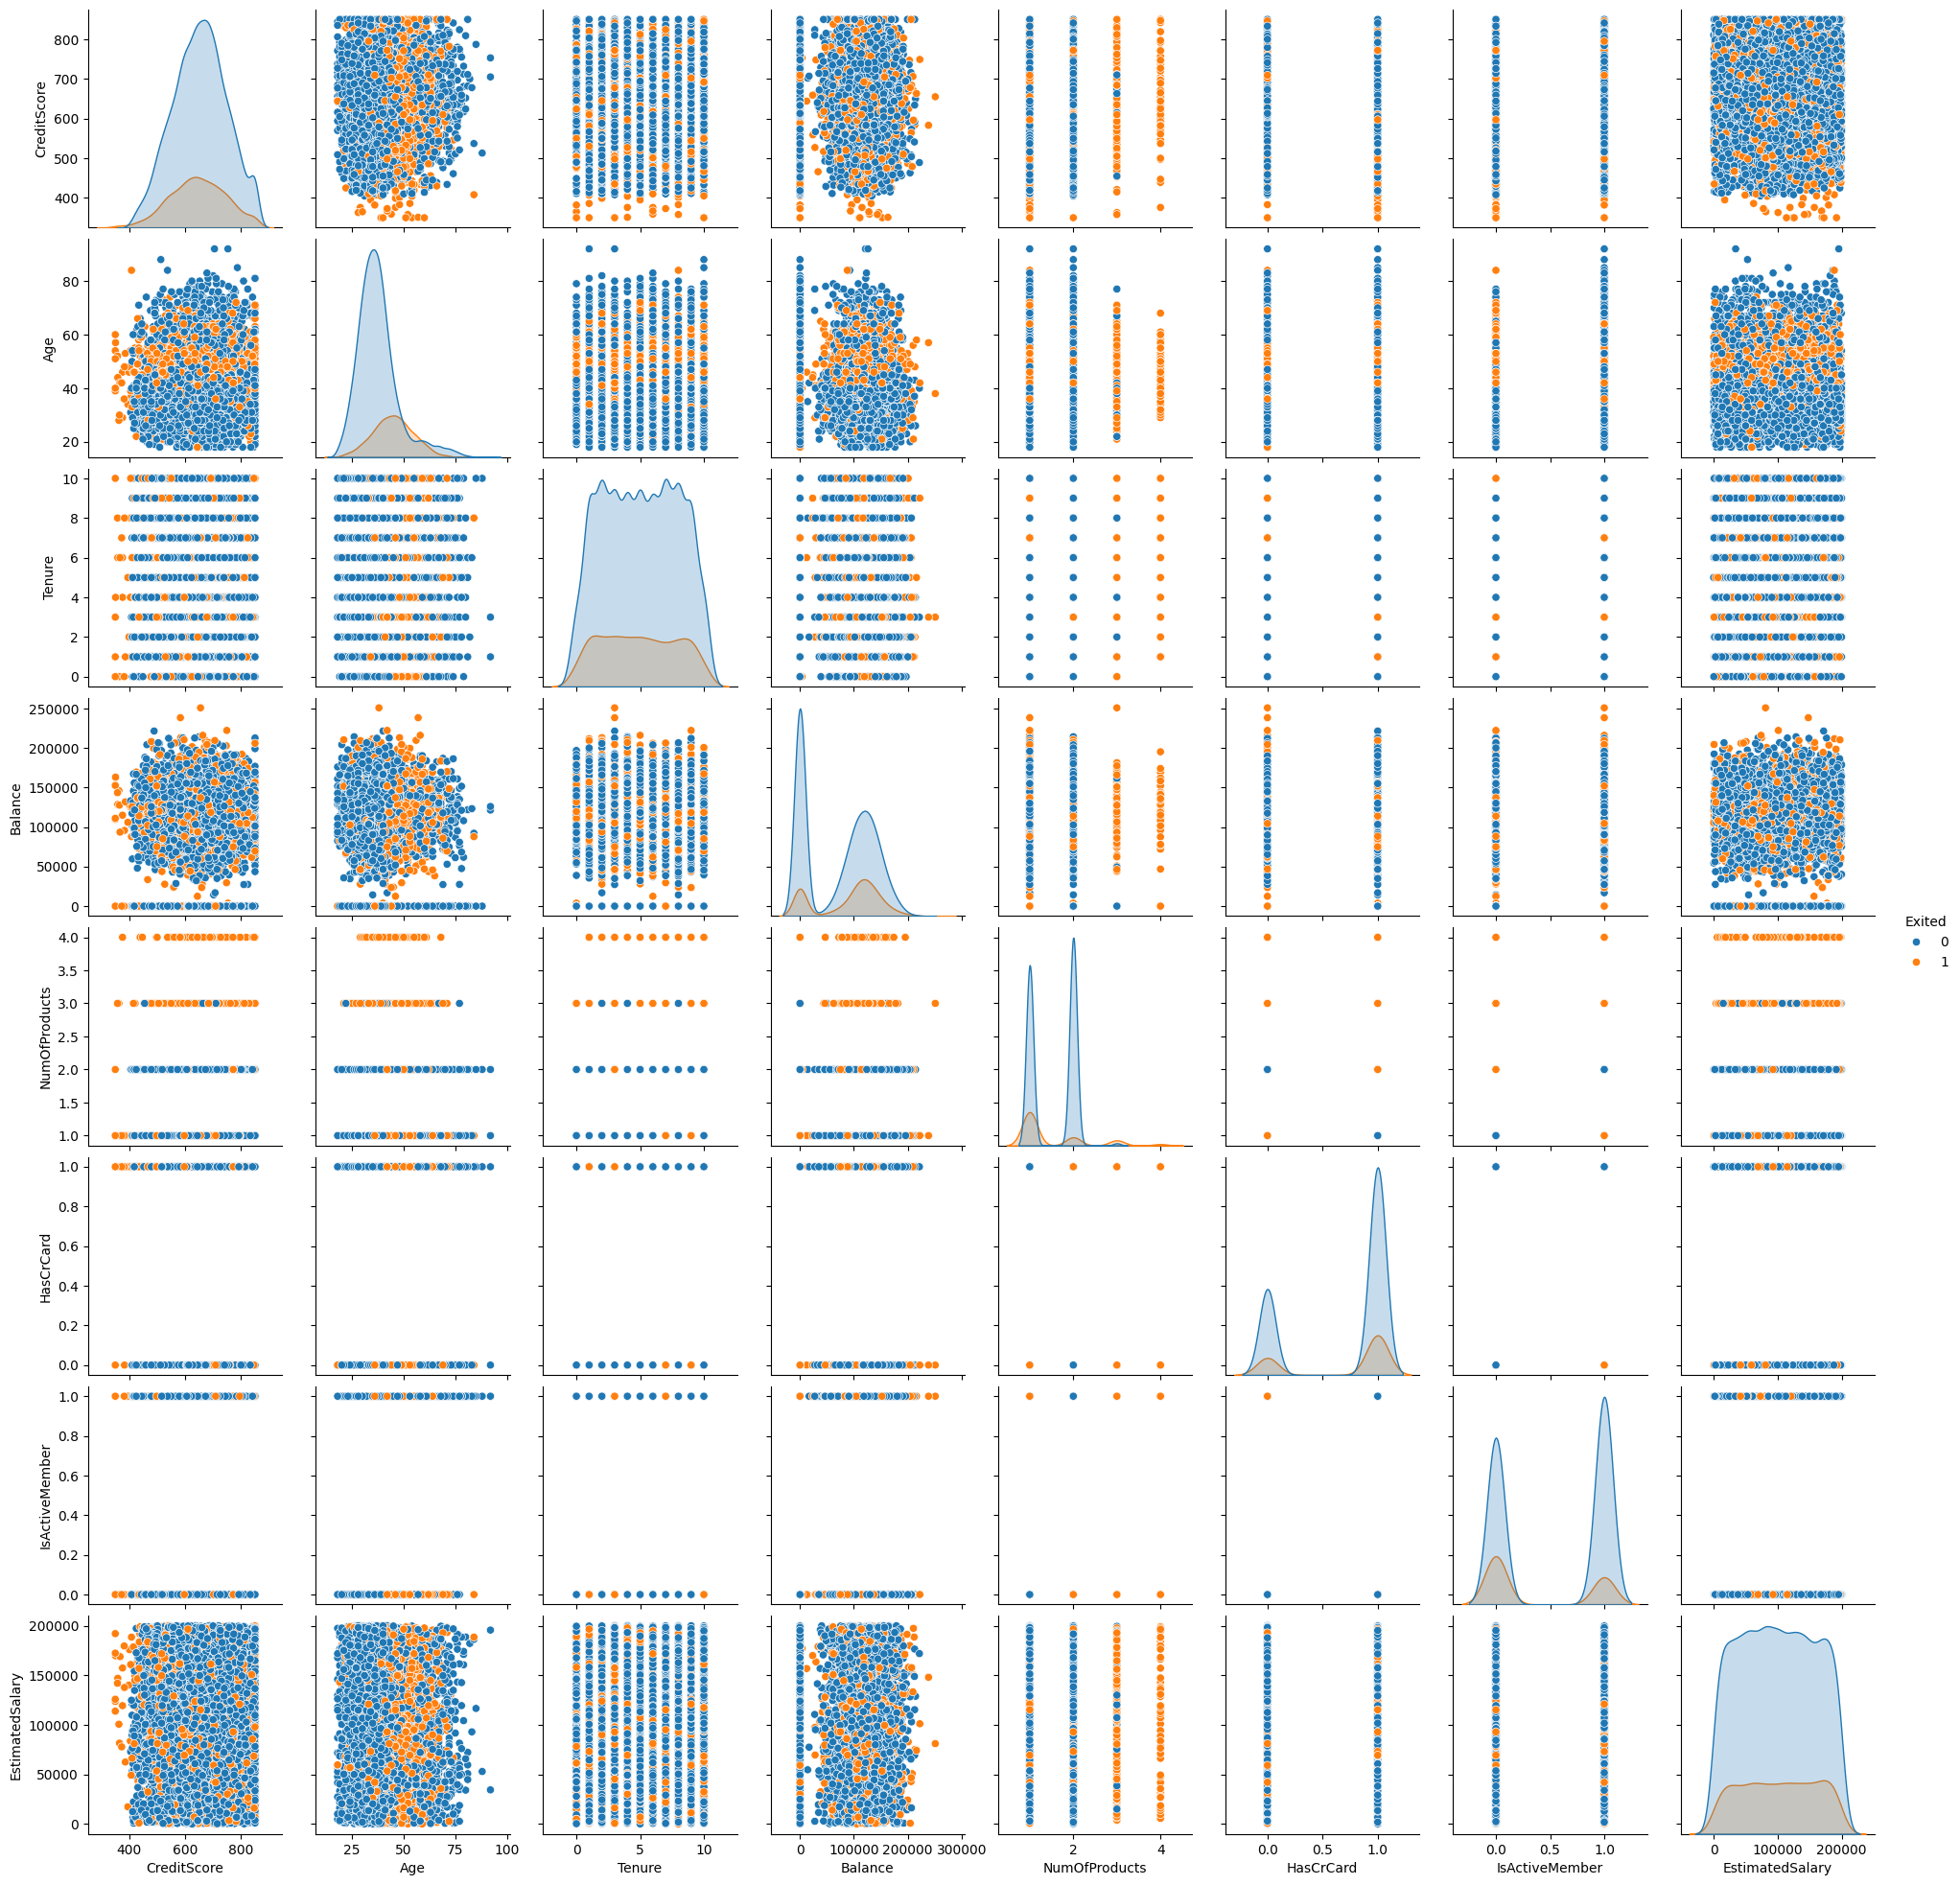

In [26]:
# Visualizing
#g = sns.pairplot(Data_v, hue = 'Exited') #seaborn is used for statistical data visualizations
g = sns.pairplot(Data, hue = 'Exited') #seaborn is used for statistical data visualizations

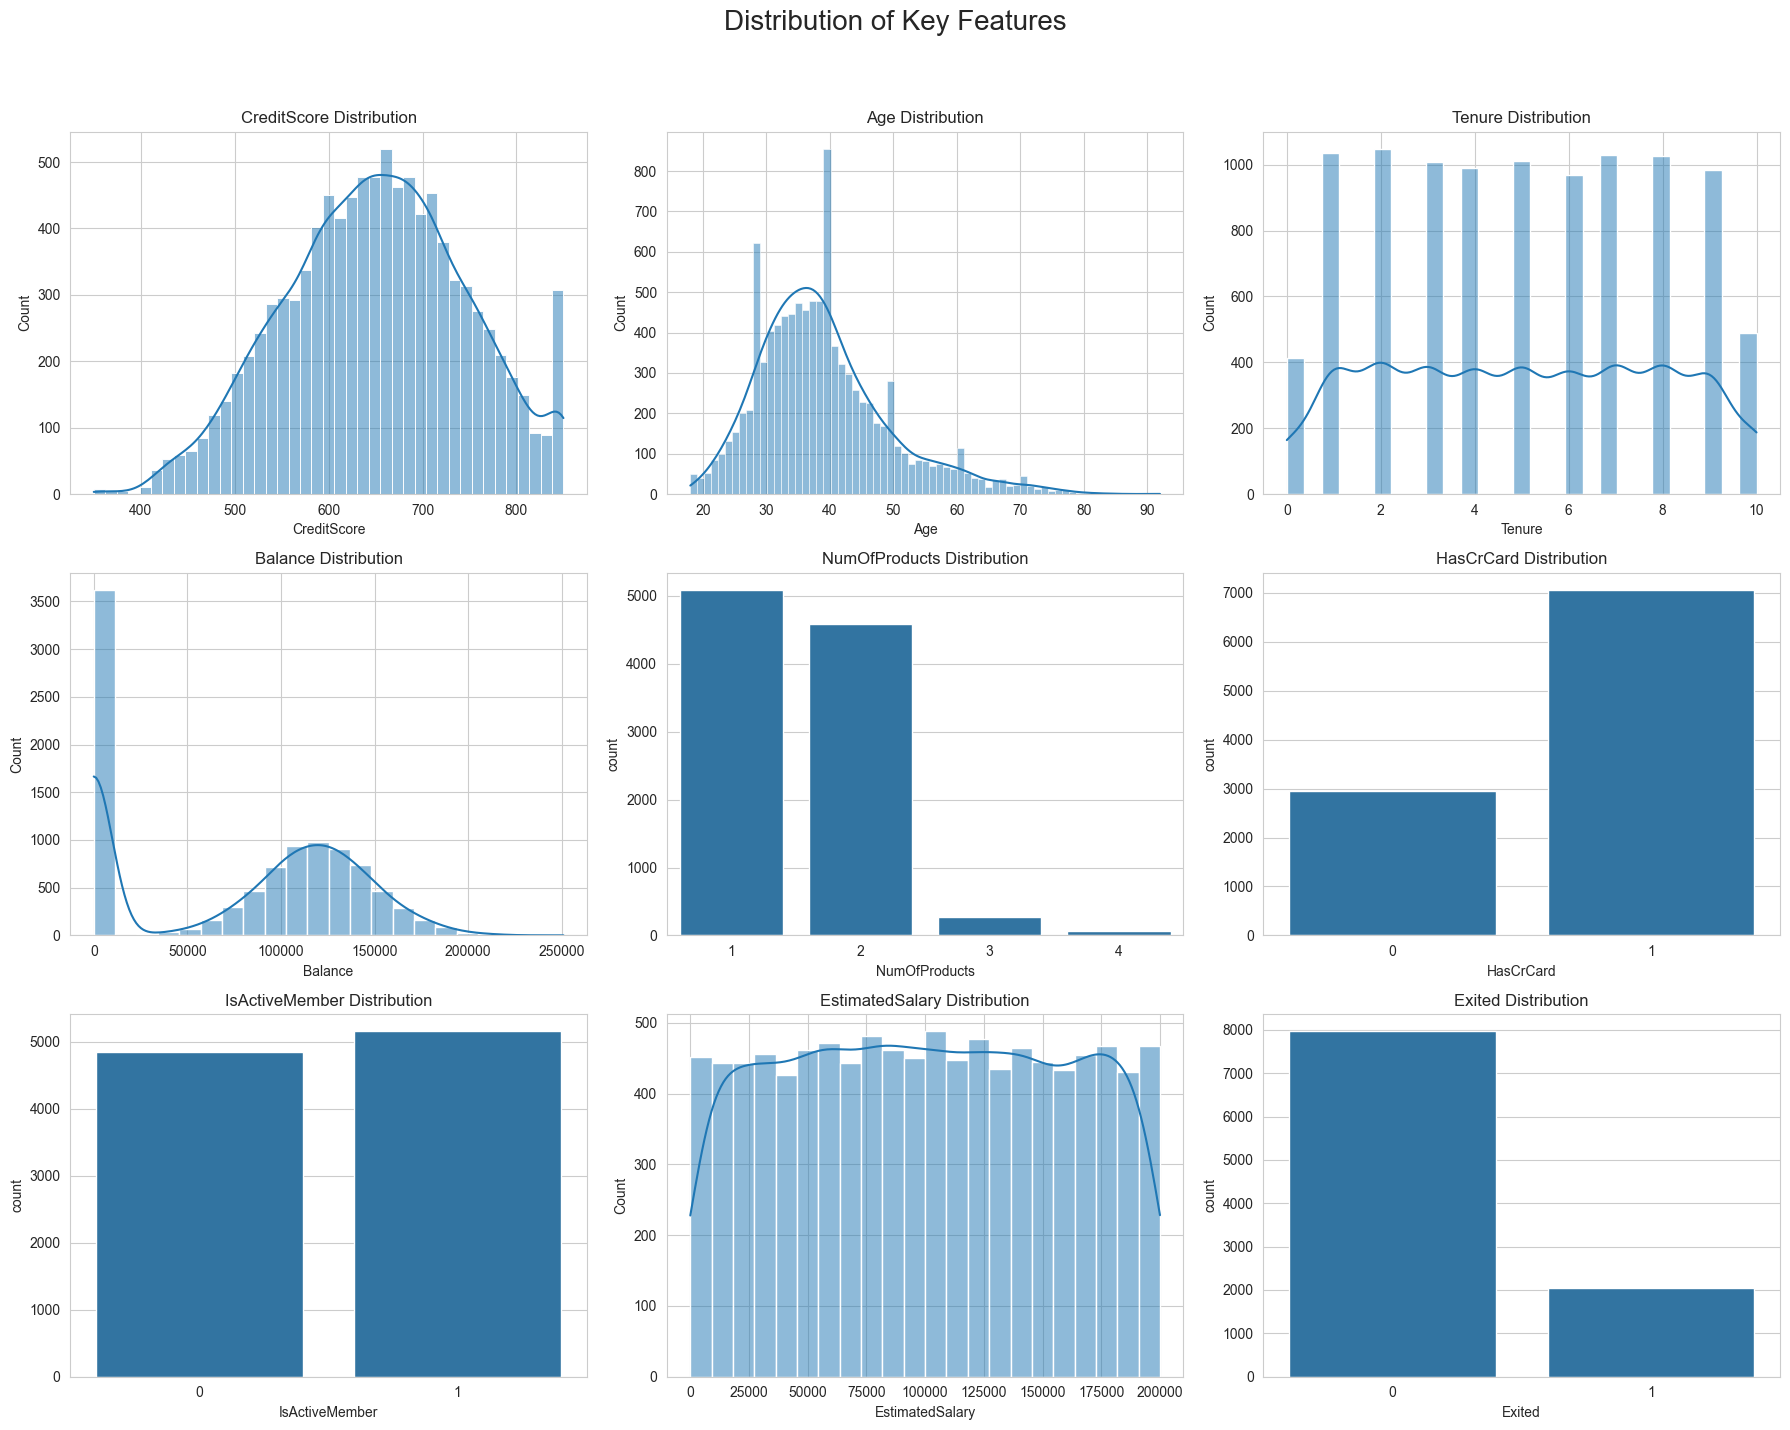

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribution of Key Features', fontsize=20)

# Plot distribution of CreditScore
sns.histplot(Data['CreditScore'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('CreditScore Distribution')

# Plot distribution of Age
sns.histplot(Data['Age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

# Plot distribution of Tenure
sns.histplot(Data['Tenure'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Tenure Distribution')

# Plot distribution of Balance
sns.histplot(Data['Balance'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')

# Plot distribution of NumOfProducts
sns.countplot(x='NumOfProducts', data=Data, ax=axes[1, 1])
axes[1, 1].set_title('NumOfProducts Distribution')

# Plot distribution of HasCrCard
sns.countplot(x='HasCrCard', data=Data, ax=axes[1, 2])
axes[1, 2].set_title('HasCrCard Distribution')

# Plot distribution of IsActiveMember
sns.countplot(x='IsActiveMember', data=Data, ax=axes[2, 0])
axes[2, 0].set_title('IsActiveMember Distribution')

# Plot distribution of EstimatedSalary
sns.histplot(Data['EstimatedSalary'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('EstimatedSalary Distribution')

# Plot distribution of Exited
sns.countplot(x='Exited', data=Data, ax=axes[2, 2])
axes[2, 2].set_title('Exited Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [26]:
# Summary statistics
summary_statistics = Data.describe()
summary_statistics

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


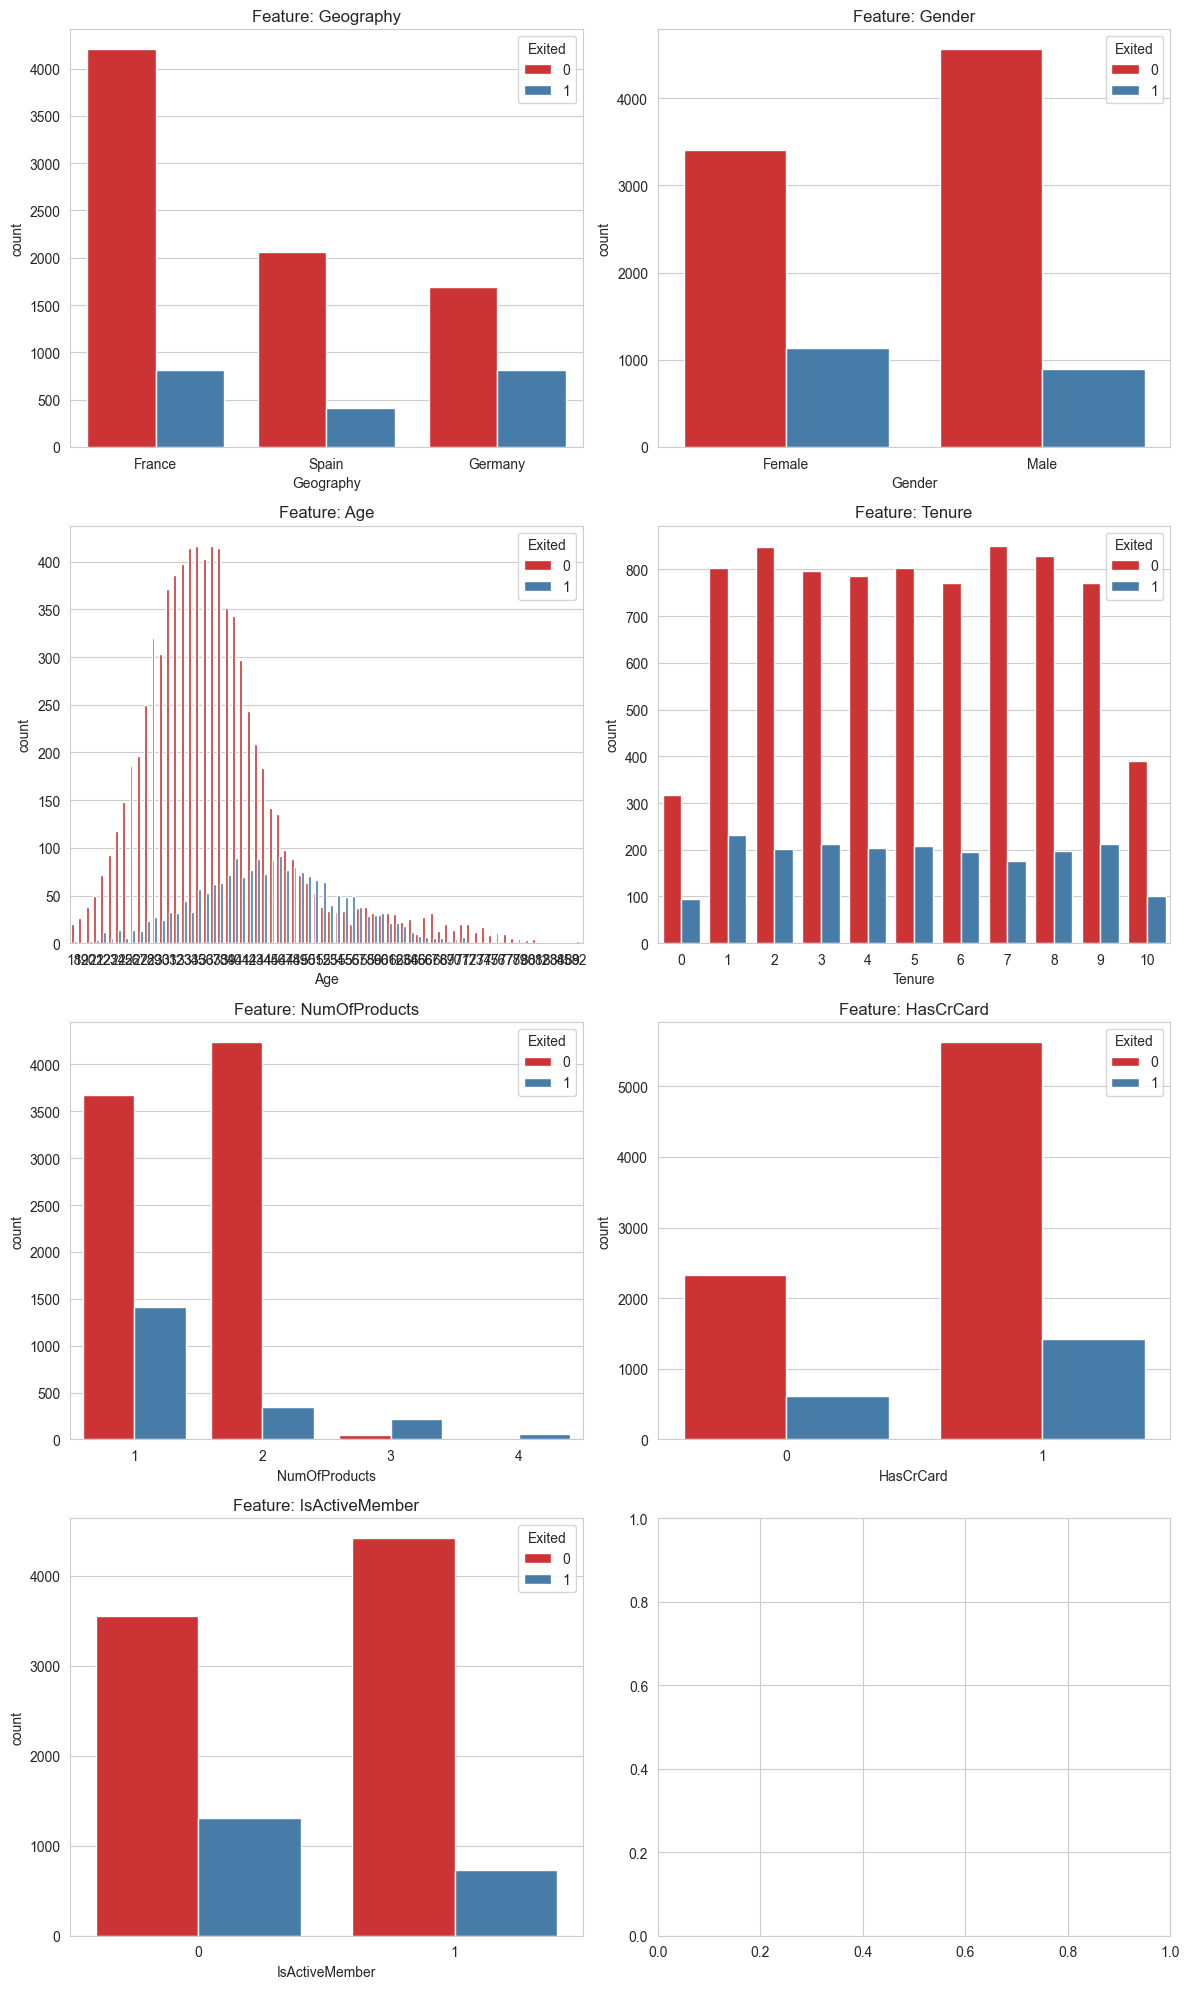

In [27]:
# Investigate all the features by our target 'Exited'
features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Set up the figure and axes for two columns
n = len(features)
cols = 2
rows = (n + 1) // cols  # Calculate number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()  # Flatten the axes to easily iterate over them

for i, f in enumerate(features):
    sns.countplot(x=f, data=Data, hue='Exited', palette="Set1", ax=axes[i])
    axes[i].set_title(f'Feature: {f}')
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The median of CreditScore is:  652.0
The median of Age is:  37.0
The median of Tenure is:  5.0
The median of Balance is:  97198.54000000001
The median of NumOfProducts is:  1.0
The median of HasCrCard is:  1.0
The median of IsActiveMember is:  1.0
The median of EstimatedSalary is:  100193.915
The median of Exited is:  0.0


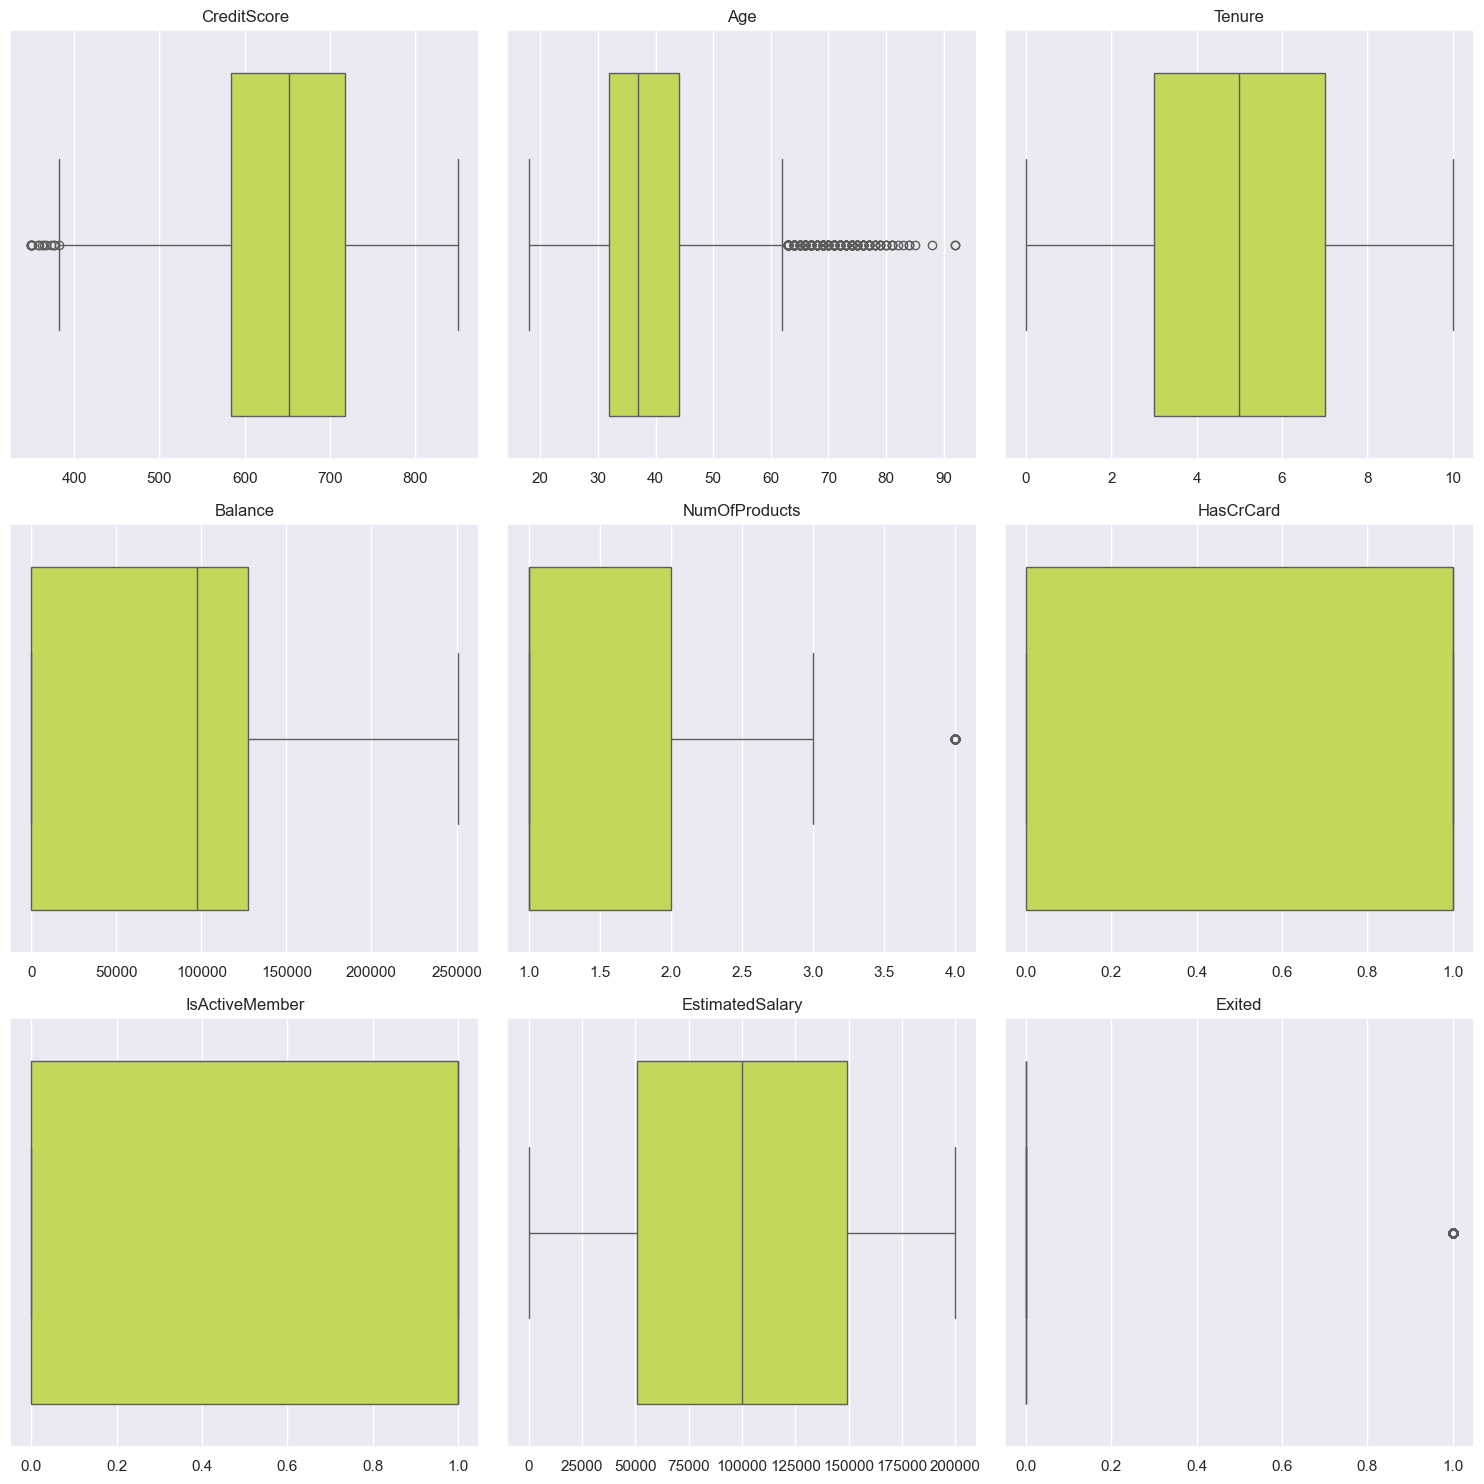

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = Data.select_dtypes(include=numerics).columns

# Increase the size of sns plots
sns.set_theme(rc={'figure.figsize':(8, 5)})

# Set up the figure and axes for three columns
n = len(n_variables)
cols = 3
rows = (n + 2) // cols  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes to easily iterate over them

for i, c in enumerate(n_variables):
    x = Data[c].values
    sns.boxplot(x=x, color='#D1EC46', ax=axes[i])
    axes[i].set_title(c)
    print(f'The median of {n_variables[i]} is: ', Data[c].median())

# Hide any unused axes
for i in range(len(n_variables), len(axes)):
    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
#need more investigation (ALI)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [30]:
# # Making categorical variables into numeric representation
# # Encode 'Gender' column using LabelEncoder (convert Male to 0, Female to 1)
# label_encoder = LabelEncoder()
# Data['Gender'] = label_encoder.fit_transform(Data['Gender'])


In [32]:
# Making categorical variables into numeric representation
# Encode 'Gender' column using LabelEncoder (convert Male to 0, Female to 1)
label_encoder = LabelEncoder()
Data['Gender'] = label_encoder.fit_transform(Data['Gender'])

### Perform one-hot encoding for Geography, Gender, and Card Type categorical and variables
#new_data = pd.get_dummies(Data, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

### Perform one-hot encoding for Geography
new_data = pd.get_dummies(Data, columns = ['Geography'],dtype=int)
#/////////////////////


#///////////////////////////////
# Display the first few rows of the updated DataFrame
new_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [33]:
new_data.shape

(10000, 13)

dont run next box


In [34]:
# # Encode 'Geography_France' column using LabelEncoder (convert False to 0, True to 1)
# label_encoder = LabelEncoder()
# new_data['Geography_France'] = label_encoder.fit_transform(new_data['Geography_France'])

# # Encode 'Geography_Germany' column using LabelEncoder (convert False to 0, True to 1)
# label_encoder = LabelEncoder()
# new_data['Geography_Germany'] = label_encoder.fit_transform(new_data['Geography_Germany'])

# # Encode 'Geography_Spain' column using LabelEncoder (convert False to 0, True to 1)
# label_encoder = LabelEncoder()
# new_data['Geography_Spain'] = label_encoder.fit_transform(new_data['Geography_Spain'])

In [35]:
new_data.shape

(10000, 13)

In [36]:
#///////////////////////////////
# Display the first few rows of the updated DataFrame
new_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [37]:
# Scaling our columns
scale_vars = ['CreditScore','EstimatedSalary','Tenure', 'Balance','Age', 'NumOfProducts']
scaler = MinMaxScaler()
new_data[scale_vars] = scaler.fit_transform(new_data[scale_vars])
new_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [38]:
new_data.shape

(10000, 13)

In [39]:
# Calculate correlation matrix
correlation_matrix = new_data.corr()
correlation_matrix


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667


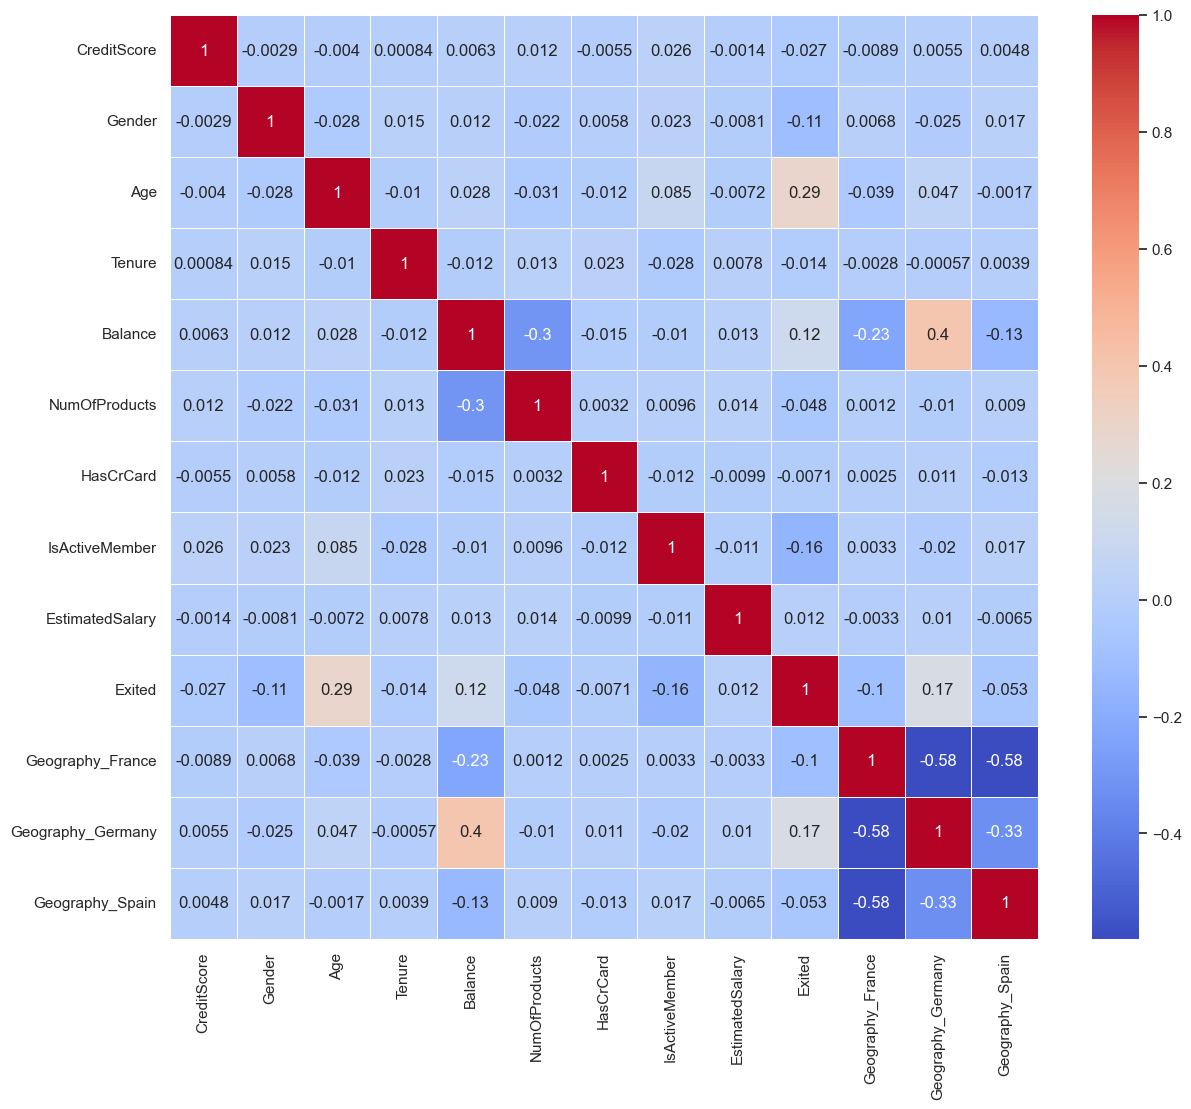

In [40]:
# Create the heatmap
plt.figure(figsize=(14, 12))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.show()

In [41]:
# Select features with high correlation with the target variable 'Exited'
correlation_with_target = correlation_matrix['Exited'].sort_values(ascending=False)
correlation_with_target

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

dont run the following Box to keep using all features

In [67]:
# Combine the features and target variable 'Exited' into a single DataFrame
""" features = [
    'Age', 'Geography_Germany', 'IsActiveMember_0', 'Balance',
    'Gender_Female', 'EstimatedSalary', 'IsActiveMember_1', 'Gender_Male',
    'Geography_France', 'Geography_Spain', 'Exited'
] """

features = [
    'Age', 'Geography_Germany', 'Geography_Spain', 'Geography_France',
    'Gender', 'IsActiveMember', 'Balance','EstimatedSalary', 'Exited'
]

Data_selected = new_data[features]

# Display the first few rows of the combined DataFrame
Data_selected.head()

,Age,Geography_Germany,Geography_Spain,Geography_France,Gender,IsActiveMember,Balance,EstimatedSalary,Exited
0,0.324324,0,0,1,0,1,0.000000,0.506735,1
1,0.310811,0,1,0,0,1,0.334031,0.562709,0
2,0.324324,0,0,1,0,0,0.636357,0.569654,1
3,0.283784,0,0,1,0,0,0.000000,0.469120,0
4,0.337838,0,1,0,0,1,0.500246,0.395400,0


In [42]:
# Combine the features and target variable 'Exited' into a single DataFrame
""" features = [
    'Age', 'Geography_Germany', 'IsActiveMember_0', 'Balance',
    'Gender_Female', 'EstimatedSalary', 'IsActiveMember_1', 'Gender_Male',
    'Geography_France', 'Geography_Spain', 'Exited'
] """

features = [
    'CreditScore', 'Gender','Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Geography_France', 'Exited'
]

Data_selected = new_data[features]

# Display the first few rows of the combined DataFrame
Data_selected.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Geography_France,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,0.506735,0,0,1,1
1,0.516,0,0.310811,0.1,0.334031,0.000000,1,0.562709,0,1,0,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,0,0.569654,0,0,1,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0.469120,0,0,1,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,0.395400,0,1,0,0


In [43]:
Data_selected.shape

(10000, 12)

In [44]:
df = pd.DataFrame(Data_selected)

# Save DataFrame to a CSV file
df.to_csv('Data_selected_cleaned_v5.csv', index=False)

print("Data saved to 'Data_selected_cleaned_v5.csv'")

Data saved to 'Data_selected_cleaned_v5.csv'


In [45]:
print(df.head())

   CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
0        0.538       0  0.324324     0.2  0.000000       0.000000   
1        0.516       0  0.310811     0.1  0.334031       0.000000   
2        0.304       0  0.324324     0.8  0.636357       0.666667   
3        0.698       0  0.283784     0.1  0.000000       0.333333   
4        1.000       0  0.337838     0.2  0.500246       0.000000   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0               1         0.506735                  0                0   
1               1         0.562709                  0                1   
2               0         0.569654                  0                0   
3               0         0.469120                  0                0   
4               1         0.395400                  0                1   

   Geography_France  Exited  
0                 1       1  
1                 0       0  
2                 1       1  
3                 1 

In [46]:
# Investigate all the elements whithin each Feature

for column in df:
    unique_vals = np.unique(df[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CreditScore :460
The number of values for feature Gender :2 -- [0 1]
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [0.         0.33333333 0.66666667 1.        ]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Geography_Germany :2 -- [0 1]
The number of values for feature Geography_Spain :2 -- [0 1]
The number of values for feature Geography_France :2 -- [0 1]
The number of values for feature Exited :2 -- [0 1]


In [47]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  float64
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  int64  
 9   Geography_Spain    10000 non-null  int64  
 10  Geography_France   10000 non-null  int64  
 11  Exited             10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB
None
   CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
0        0.538       0  0.324324     0.2  0.000000       0.000000   
1        0.516       0  0

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [49]:
# Load dataset
data_df = pd.read_csv('Data_selected_cleaned_v5.csv')

# Display basic info about the dataset
print(data_df.info())
print(data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  float64
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  int64  
 9   Geography_Spain    10000 non-null  int64  
 10  Geography_France   10000 non-null  int64  
 11  Exited             10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB
None
   CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
0        0.538       0  0.324324     0.2  0.000000       0.000000   
1        0.516       0  0

In [50]:
data_df.shape

(10000, 12)

In [51]:
# Investigate all the elements whithin each Feature

for column in data_df:
    unique_vals = np.unique(data_df[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CreditScore :460
The number of values for feature Gender :2 -- [0 1]
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [0.         0.33333333 0.66666667 1.        ]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Geography_Germany :2 -- [0 1]
The number of values for feature Geography_Spain :2 -- [0 1]
The number of values for feature Geography_France :2 -- [0 1]
The number of values for feature Exited :2 -- [0 1]


In [52]:
# Separate features (X) and target variable (y)
X = data_df.drop(columns=['Exited'])
y = data_df['Exited']

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter


In [54]:
# 2. Check the original distribution of the classes
print(f"Original class distribution: {Counter(y)}")


Original class distribution: Counter({0: 7963, 1: 2037})


In [55]:
# 3. Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 4. Check the class distribution after applying SMOTE
print(f"Resampled class distribution: {Counter(y_resampled)}")


Resampled class distribution: Counter({1: 7963, 0: 7963})


4. Split the Dataset into Training and Test Sets

In [86]:
"""  #Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,stratify=y, random_state=42) """

'  #Split the dataset into training (80%) and testing (20%) sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,stratify=y, random_state=42) '

In [56]:
#Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True,stratify=y_resampled, random_state=42)

5. Train Various Classification Models
Now, we’ll train several classification models: Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine.

In [83]:
# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # SVM with probability to compute ROC AUC
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}


# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Model: {name}")
    print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    
    print(f"Testing Precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"Training Precision: {precision_score(y_train, y_train_pred):.4f}")
    
    print(f"Testing Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"Training Recall: {recall_score(y_train, y_train_pred):.4f}")
    
    print(f"Testing F1-Score: {f1_score(y_test, y_test_pred):.4f}")
    print(f"Training F1-Score: {f1_score(y_train, y_train_pred):.4f}")

    if hasattr(model, 'predict_proba'):  # Only if model provides probability for ROC AUC
        y_prob = model.predict_proba(X_test)[:, 1]
        print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print("-" * 50)

Model: Logistic Regression
Testing Accuracy: 0.7144
Training Accuracy: 0.7146
Testing Precision: 0.7185
Training Precision: 0.7188
Testing Recall: 0.7050
Training Recall: 0.7050
Testing F1-Score: 0.7117
Training F1-Score: 0.7118
ROC-AUC: 0.7825
--------------------------------------------------
Model: Decision Tree
Testing Accuracy: 0.8340
Training Accuracy: 1.0000
Testing Precision: 0.8329
Training Precision: 1.0000
Testing Recall: 0.8355
Training Recall: 1.0000
Testing F1-Score: 0.8342
Training F1-Score: 1.0000
ROC-AUC: 0.8340
--------------------------------------------------
Model: Random Forest
Testing Accuracy: 0.8892
Training Accuracy: 1.0000
Testing Precision: 0.8924
Training Precision: 1.0000
Testing Recall: 0.8851
Training Recall: 1.0000
Testing F1-Score: 0.8887
Training F1-Score: 1.0000
ROC-AUC: 0.9553
--------------------------------------------------
Model: SVM
Testing Accuracy: 0.7781
Training Accuracy: 0.7943
Testing Precision: 0.7911
Training Precision: 0.8077
Testing R

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # SVM with probability to compute ROC AUC
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print(f"{'Metric':<20}{'Train':<12}{'Test'}")
    print("-" * 45)
    print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
    print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
    print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")

    if hasattr(model, 'predict_proba'):
        y_test_prob = model.predict_proba(X_test)[:, 1]
        y_train_prob = model.predict_proba(X_train)[:, 1]
        print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")
           
    print("=" * 45)
    print("=" * 45)



Model: Logistic Regression
Metric              Train       Test
---------------------------------------------
Accuracy            0.7146      0.7144
Precision           0.7188      0.7185
Recall              0.7050      0.7050
F1-Score            0.7118      0.7117
ROC-AUC             0.7800      0.7825

Model: Decision Tree
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8352
Precision           1.0000      0.8363
Recall              1.0000      0.8336
F1-Score            1.0000      0.8350
ROC-AUC             1.0000      0.8352

Model: Random Forest
Metric              Train       Test
---------------------------------------------
Accuracy            0.9999      0.8858
Precision           0.9998      0.8927
Recall              1.0000      0.8770
F1-Score            0.9999      0.8847
ROC-AUC             1.0000      0.9557

Model: SVM
Metric              Train       Test
---------------------------------------------

To add majority voting of the machine learning algorithms to your code, we can use VotingClassifier from sklearn.ensemble. Majority voting is performed using voting='hard' (based on predicted class labels), or voting='soft' (based on predicted probabilities, if all models support predict_proba).

In your case, since all your classifiers either support predict_proba or are initialized to do so (like SVC(probability=True)), we can use voting='soft'.

Here’s your updated code with the majority voting ensemble added and evaluated in the same loop:

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define individual classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Create a list of (name, model) tuples for VotingClassifier
estimators = [(name, model) for name, model in models.items()]

# Add Majority Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
models['Majority Voting'] = voting_clf

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print(f"{'Metric':<20}{'Train':<12}{'Test'}")
    print("-" * 45)
    print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
    print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
    print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")

    # Use predict_proba if available for ROC AUC
    if hasattr(model, 'predict_proba'):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
        print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")

    print("=" * 45)
    print("=" * 45)



Model: Logistic Regression
Metric              Train       Test
---------------------------------------------
Accuracy            0.7146      0.7144
Precision           0.7188      0.7185
Recall              0.7050      0.7050
F1-Score            0.7118      0.7117
ROC-AUC             0.7800      0.7825

Model: Decision Tree
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8324
Precision           1.0000      0.8332
Recall              1.0000      0.8311
F1-Score            1.0000      0.8322
ROC-AUC             1.0000      0.8324

Model: Random Forest
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8905
Precision           1.0000      0.8962
Recall              1.0000      0.8832
F1-Score            1.0000      0.8897
ROC-AUC             1.0000      0.9569

Model: SVM
Metric              Train       Test
---------------------------------------------

new section

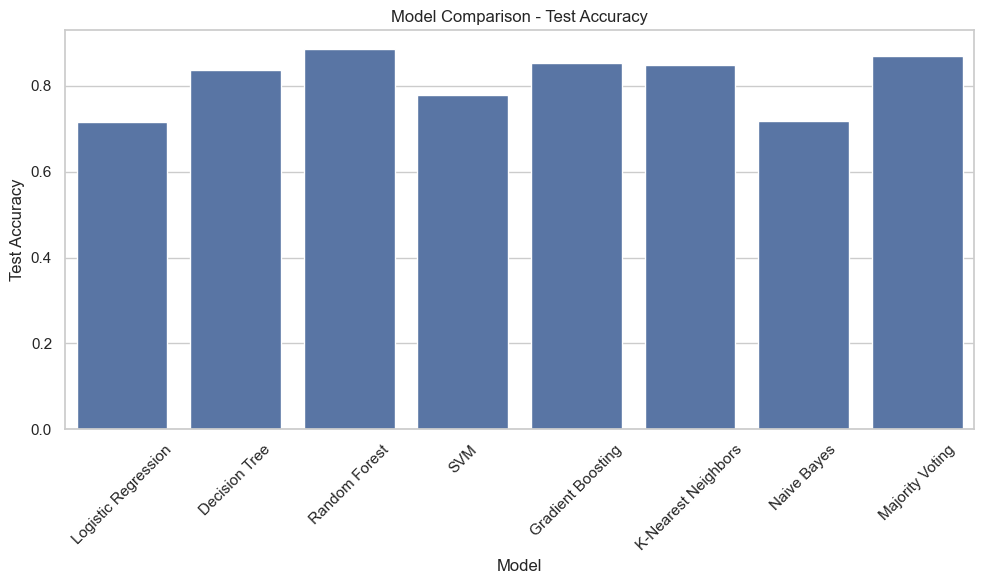

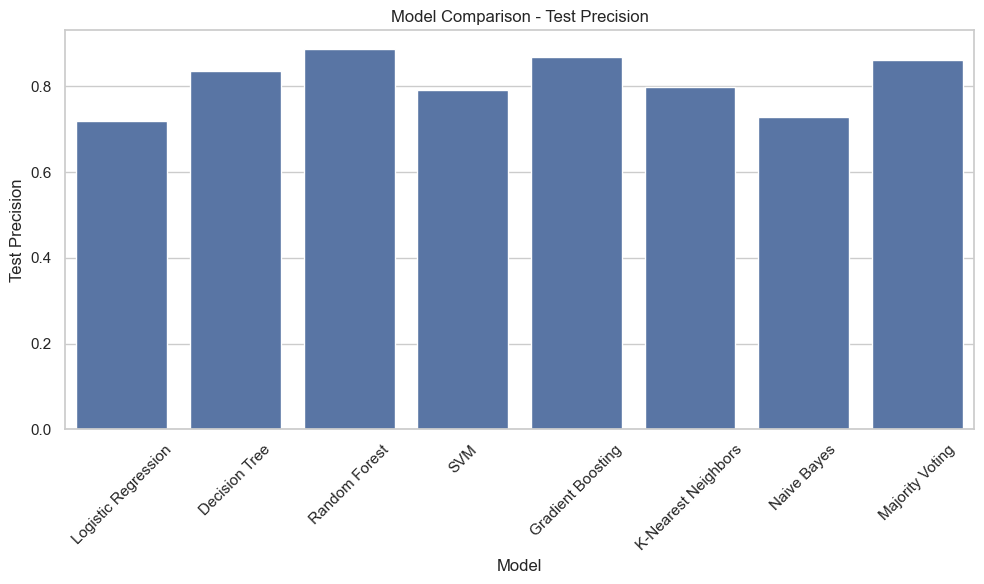

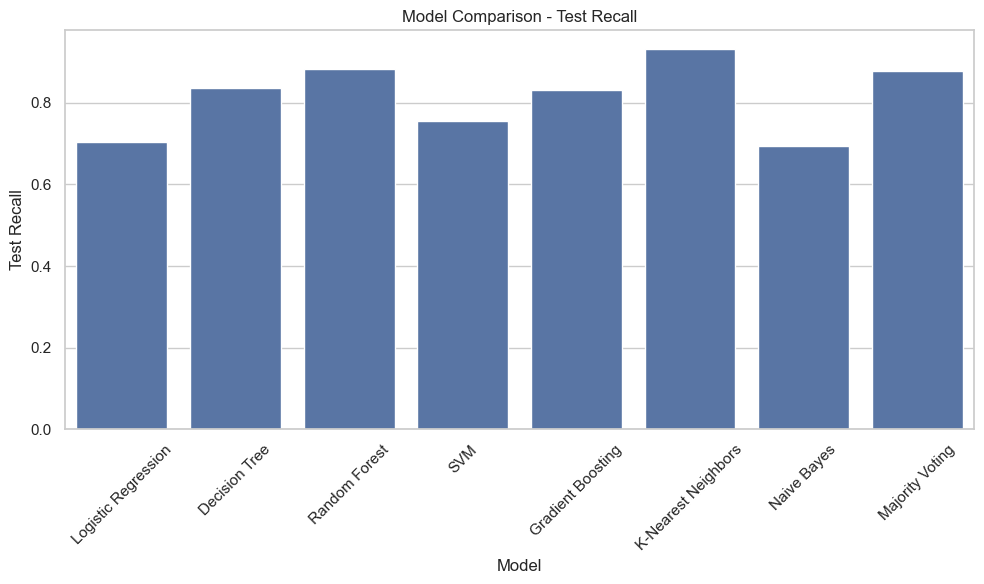

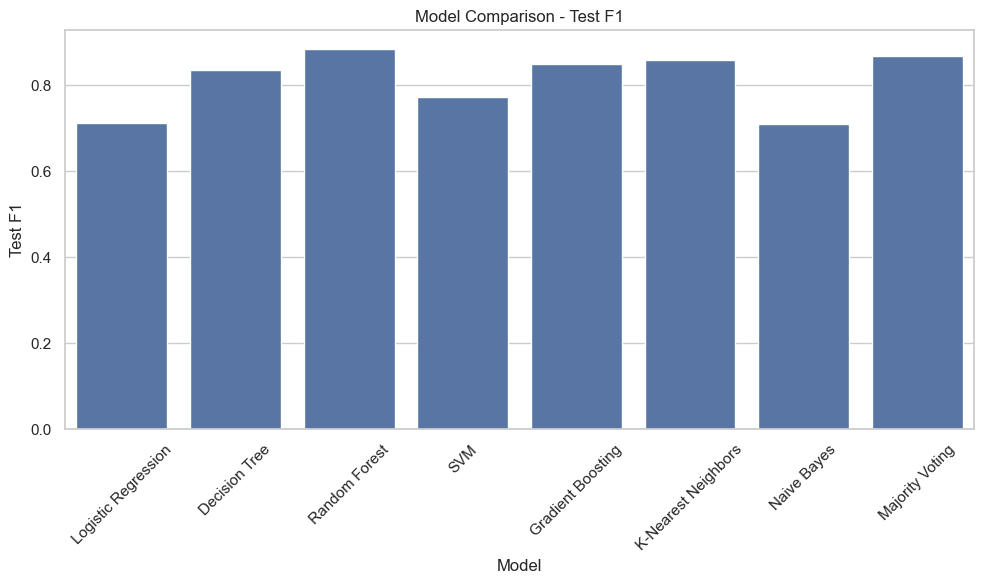

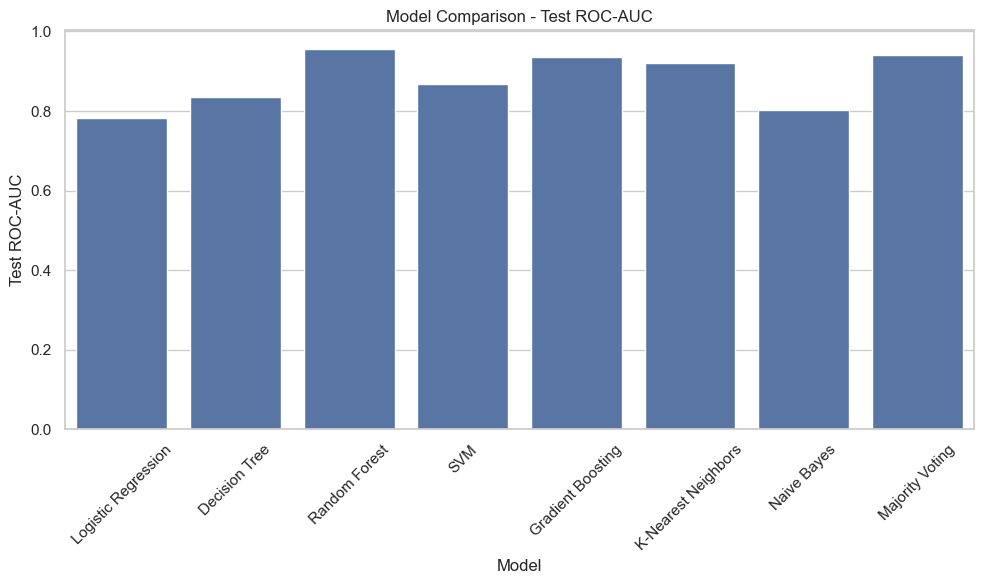

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define individual classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Add Majority Voting Classifier (Soft Voting)
estimators = [(name, model) for name, model in models.items()]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
models['Majority Voting'] = voting_clf

# Initialize list to store results
results = []

# Train, evaluate and collect metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Collect metrics
    metrics = {
        'Model': name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred, zero_division=0),
        'Test Precision': precision_score(y_test, y_test_pred, zero_division=0),
        'Train Recall': recall_score(y_train, y_train_pred, zero_division=0),
        'Test Recall': recall_score(y_test, y_test_pred, zero_division=0),
        'Train F1': f1_score(y_train, y_train_pred, zero_division=0),
        'Test F1': f1_score(y_test, y_test_pred, zero_division=0),
    }

    if hasattr(model, 'predict_proba'):
        metrics['Train ROC-AUC'] = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        metrics['Test ROC-AUC'] = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        metrics['Train ROC-AUC'] = None
        metrics['Test ROC-AUC'] = None

    results.append(metrics)

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot test metrics
sns.set(style="whitegrid")
metrics_to_plot = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Test ROC-AUC']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x='Model', y=metric)
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Add Majority Voting Classifier (Hard Voting)

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define individual classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Create a list of (name, model) tuples for VotingClassifier
estimators = [(name, model) for name, model in models.items()]

# Add Majority Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(estimators=estimators, voting='hard')
models['Majority Voting'] = voting_clf

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print(f"{'Metric':<20}{'Train':<12}{'Test'}")
    print("-" * 45)
    print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
    print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
    print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")

    # Use predict_proba if available for ROC AUC
    if hasattr(model, 'predict_proba'):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
        print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")

    print("=" * 45)
    print("=" * 45)



Model: Logistic Regression
Metric              Train       Test
---------------------------------------------
Accuracy            0.7146      0.7144
Precision           0.7188      0.7185
Recall              0.7050      0.7050
F1-Score            0.7118      0.7117
ROC-AUC             0.7800      0.7825

Model: Decision Tree
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8327
Precision           1.0000      0.8288
Recall              1.0000      0.8387
F1-Score            1.0000      0.8337
ROC-AUC             1.0000      0.8327

Model: Random Forest
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8839
Precision           1.0000      0.8917
Recall              1.0000      0.8738
F1-Score            1.0000      0.8827
ROC-AUC             1.0000      0.9548

Model: SVM
Metric              Train       Test
---------------------------------------------

soft voting with weights
Let's separately evaluate the Voting Classifier with:

Soft Voting with Weights – Assign higher weights to classifiers that tend to perform better.

Stacking Classifier – A meta-model combines predictions from base models.

Below is the updated and extended code, where:

Voting is done with soft voting + weights.

StackingClassifier is used as a separate ensemble method.



In [88]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Base models
base_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Evaluate base models
for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print(f"{'Metric':<20}{'Train':<12}{'Test'}")
    print("-" * 45)
    print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
    print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
    print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")

    if hasattr(model, 'predict_proba'):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
        print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")

    print("=" * 45)
    print("=" * 45)

# Create list of (name, model) tuples
estimators = [(name, model) for name, model in base_models.items()]

# --- Weighted Voting Classifier (Soft Voting) ---
# Assign weights (e.g., based on prior knowledge or test performance)
voting_weights = [2, 1, 3, 2, 3, 1, 1]  # Example: favoring Random Forest, Gradient Boosting, SVM

voting_clf = VotingClassifier(estimators=estimators, voting='soft', weights=voting_weights)
voting_clf.fit(X_train, y_train)
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)
y_train_prob = voting_clf.predict_proba(X_train)[:, 1]
y_test_prob = voting_clf.predict_proba(X_test)[:, 1]

print(f"\nModel: Weighted Voting Classifier (Soft)")
print(f"{'Metric':<20}{'Train':<12}{'Test'}")
print("-" * 45)
print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")
print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")
print("=" * 45)
print("=" * 45)

# --- Stacking Classifier ---
# Meta-classifier
meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)
y_train_prob = stacking_clf.predict_proba(X_train)[:, 1]
y_test_prob = stacking_clf.predict_proba(X_test)[:, 1]

print(f"\nModel: Stacking Classifier (Meta: Logistic Regression)")
print(f"{'Metric':<20}{'Train':<12}{'Test'}")
print("-" * 45)
print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")
print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")
print("=" * 45)
print("=" * 45)



Model: Logistic Regression
Metric              Train       Test
---------------------------------------------
Accuracy            0.7146      0.7144
Precision           0.7188      0.7185
Recall              0.7050      0.7050
F1-Score            0.7118      0.7117
ROC-AUC             0.7800      0.7825

Model: Decision Tree
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8311
Precision           1.0000      0.8274
Recall              1.0000      0.8368
F1-Score            1.0000      0.8321
ROC-AUC             1.0000      0.8311

Model: Random Forest
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8845
Precision           1.0000      0.8914
Recall              1.0000      0.8757
F1-Score            1.0000      0.8835
ROC-AUC             1.0000      0.9549

Model: SVM
Metric              Train       Test
---------------------------------------------

soft voting with weights
Let's separately evaluate the Voting Classifier with:
voting_weights = [1, 3, 3, 1, 2, 2, 1]

In [88]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Base models
base_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Evaluate base models
for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\nModel: {name}")
    print(f"{'Metric':<20}{'Train':<12}{'Test'}")
    print("-" * 45)
    print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
    print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
    print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")

    if hasattr(model, 'predict_proba'):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
        print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")

    print("=" * 45)
    print("=" * 45)

# Create list of (name, model) tuples
estimators = [(name, model) for name, model in base_models.items()]

# --- Weighted Voting Classifier (Soft Voting) ---
# Assign weights (e.g., based on prior knowledge or test performance)
voting_weights = [1, 3, 3, 1, 2, 2, 1]  # Example: favoring Random Forest, Gradient Boosting, SVM

voting_clf = VotingClassifier(estimators=estimators, voting='soft', weights=voting_weights)
voting_clf.fit(X_train, y_train)
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)
y_train_prob = voting_clf.predict_proba(X_train)[:, 1]
y_test_prob = voting_clf.predict_proba(X_test)[:, 1]

print(f"\nModel: Weighted Voting Classifier (Soft)")
print(f"{'Metric':<20}{'Train':<12}{'Test'}")
print("-" * 45)
print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")
print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")
print("=" * 45)
print("=" * 45)

# --- Stacking Classifier ---
# Meta-classifier
meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train, y_train)
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)
y_train_prob = stacking_clf.predict_proba(X_train)[:, 1]
y_test_prob = stacking_clf.predict_proba(X_test)[:, 1]

print(f"\nModel: Stacking Classifier (Meta: Logistic Regression)")
print(f"{'Metric':<20}{'Train':<12}{'Test'}")
print("-" * 45)
print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")
print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")
print("=" * 45)
print("=" * 45)



Model: Logistic Regression
Metric              Train       Test
---------------------------------------------
Accuracy            0.7146      0.7144
Precision           0.7188      0.7185
Recall              0.7050      0.7050
F1-Score            0.7118      0.7117
ROC-AUC             0.7800      0.7825

Model: Decision Tree
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8365
Precision           1.0000      0.8346
Recall              1.0000      0.8393
F1-Score            1.0000      0.8369
ROC-AUC             1.0000      0.8365

Model: Random Forest
Metric              Train       Test
---------------------------------------------
Accuracy            1.0000      0.8917
Precision           1.0000      0.8969
Recall              1.0000      0.8851
F1-Score            1.0000      0.8910
ROC-AUC             1.0000      0.9561

Model: SVM
Metric              Train       Test
---------------------------------------------

Here's the code for the StackingClassifier that uses all the base models as first-level learners and Random Forest as the meta-learner:

In [89]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

# Define the base estimators
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True)),
    ('gb', GradientBoostingClassifier()),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB())
]

# Define the StackingClassifier with Random Forest as the final estimator
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(),
    cv=5,
    passthrough=False  # If you want original features included in the meta-model, set to True
)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)
y_train_prob = stacking_clf.predict_proba(X_train)[:, 1]
y_test_prob = stacking_clf.predict_proba(X_test)[:, 1]

# Evaluation
print(f"\nModel: Stacking Classifier (Meta: Random Forest)")
print(f"{'Metric':<20}{'Train':<12}{'Test'}")
print("-" * 45)
print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")
print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")
print("=" * 45)
print("=" * 45)



Model: Stacking Classifier (Meta: Random Forest)
Metric              Train       Test
---------------------------------------------
Accuracy            0.9789      0.9036
Precision           0.9614      0.9132
Recall              0.9978      0.8920
F1-Score            0.9793      0.9025
ROC-AUC             0.9995      0.9665


When you say restrictive voting, you might be referring to restricting the number of base learners used in the ensemble—essentially selecting only the most reliable (high-performing) models instead of using all.

Here’s how we can do that in the context of a StackingClassifier using a Random Forest meta-learner, but only using a subset of the best-performing base models (for example: Random Forest, Gradient Boosting, and Logistic Regression):

Restrictive Voting in Stacking (Top Models Only)

In [90]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a restricted set of high-performing base models
restricted_estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('lr', LogisticRegression())
]

# Define the StackingClassifier with Random Forest as the meta-learner
restricted_stacking_clf = StackingClassifier(
    estimators=restricted_estimators,
    final_estimator=RandomForestClassifier(),
    cv=5,
    passthrough=False
)

# Train the restricted stacking classifier
restricted_stacking_clf.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = restricted_stacking_clf.predict(X_train)
y_test_pred = restricted_stacking_clf.predict(X_test)
y_train_prob = restricted_stacking_clf.predict_proba(X_train)[:, 1]
y_test_prob = restricted_stacking_clf.predict_proba(X_test)[:, 1]

# Evaluation
print(f"\nModel: Restrictive Stacking Classifier (Meta: Random Forest, Top Base Models Only)")
print(f"{'Metric':<20}{'Train':<12}{'Test'}")
print("-" * 45)
print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred):<12.4f}{accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Precision':<20}{precision_score(y_train, y_train_pred):<12.4f}{precision_score(y_test, y_test_pred):.4f}")
print(f"{'Recall':<20}{recall_score(y_train, y_train_pred):<12.4f}{recall_score(y_test, y_test_pred):.4f}")
print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred):<12.4f}{f1_score(y_test, y_test_pred):.4f}")
print(f"{'ROC-AUC':<20}{roc_auc_score(y_train, y_train_prob):<12.4f}{roc_auc_score(y_test, y_test_prob):.4f}")
print("=" * 45)
print("=" * 45)



Model: Restrictive Stacking Classifier (Meta: Random Forest, Top Base Models Only)
Metric              Train       Test
---------------------------------------------
Accuracy            0.9704      0.8810
Precision           0.9460      0.8926
Recall              0.9978      0.8663
F1-Score            0.9712      0.8793
ROC-AUC             0.9989      0.9479


Why Restrictive Voting?
Helps reduce noise from weak models.

Potentially increases generalization by focusing on stronger, less correlated learners.

Speeds up training time for ensemble methods.

 You're referring to a restrictive (or conservative) voting rule, where:

If any of the base models predict "churn", then the final prediction is churn.

This is essentially "OR" logic across model predictions, and it’s stricter than majority or weighted voting. Let's implement that!

In [91]:
import numpy as np

# Fit all base models first
for model in base_models.values():
    model.fit(X_train, y_train)

# Get individual predictions from all models
test_preds = np.array([model.predict(X_test) for model in base_models.values()])
train_preds = np.array([model.predict(X_train) for model in base_models.values()])

# Apply restrictive voting: predict churn (1) if any model predicts churn
y_test_pred_restrictive = np.any(test_preds == 1, axis=0).astype(int)
y_train_pred_restrictive = np.any(train_preds == 1, axis=0).astype(int)

# Evaluation
print(f"\nModel: Restrictive Voting Ensemble (Churn if ANY model predicts churn)")
print(f"{'Metric':<20}{'Train':<12}{'Test'}")
print("-" * 45)
print(f"{'Accuracy':<20}{accuracy_score(y_train, y_train_pred_restrictive):<12.4f}{accuracy_score(y_test, y_test_pred_restrictive):.4f}")
print(f"{'Precision':<20}{precision_score(y_train, y_train_pred_restrictive):<12.4f}{precision_score(y_test, y_test_pred_restrictive):.4f}")
print(f"{'Recall':<20}{recall_score(y_train, y_train_pred_restrictive):<12.4f}{recall_score(y_test, y_test_pred_restrictive):.4f}")
print(f"{'F1-Score':<20}{f1_score(y_train, y_train_pred_restrictive):<12.4f}{f1_score(y_test, y_test_pred_restrictive):.4f}")
print("=" * 45)
print("=" * 45)



Model: Restrictive Voting Ensemble (Churn if ANY model predicts churn)
Metric              Train       Test
---------------------------------------------
Accuracy            0.7905      0.7445
Precision           0.7047      0.6655
Recall              1.0000      0.9831
F1-Score            0.8268      0.7937


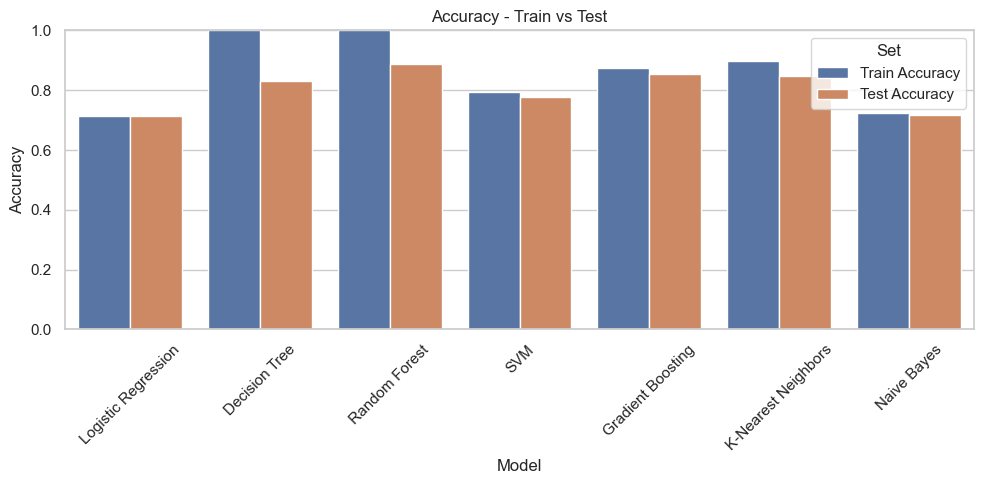

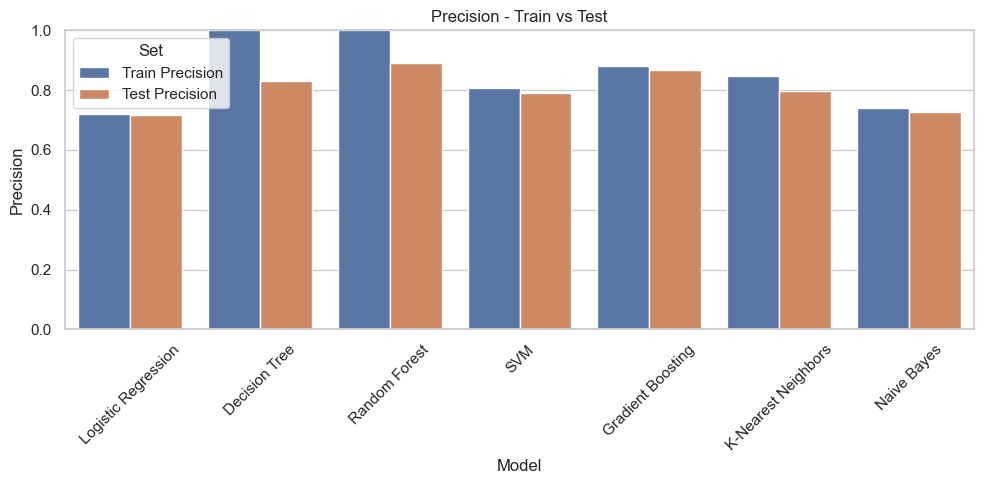

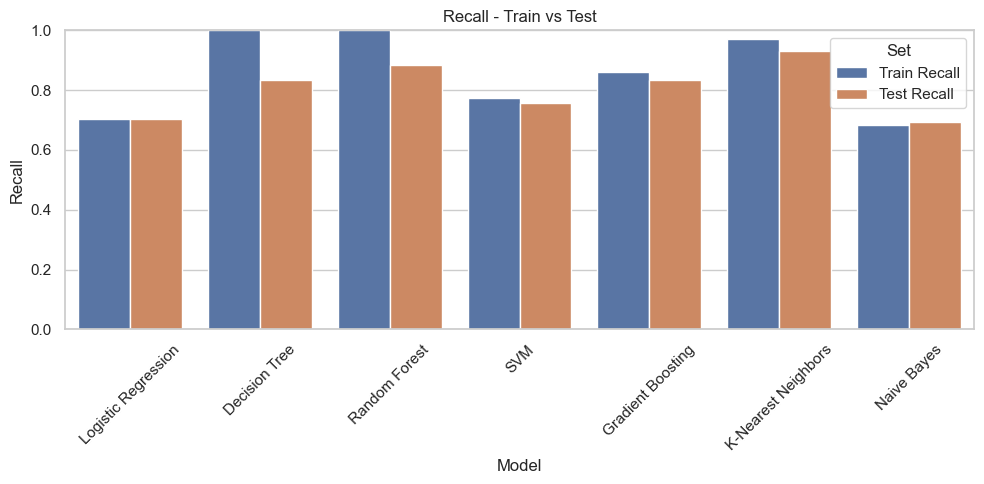

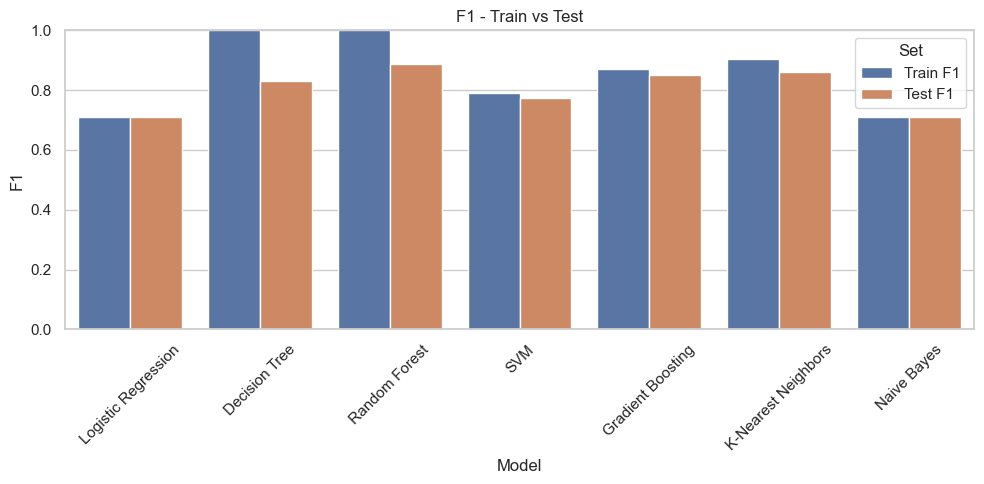

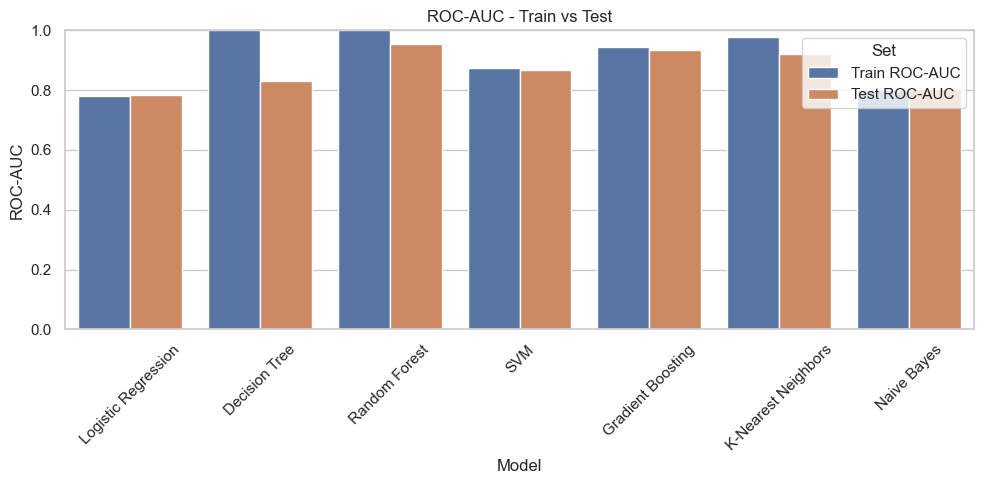

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Store metrics for plotting
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Initialize metric dictionary
    metrics = {
        'Model': name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Train Recall': recall_score(y_train, y_train_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Train F1': f1_score(y_train, y_train_pred),
        'Test F1': f1_score(y_test, y_test_pred),
    }

    # Add ROC-AUC if applicable
    if hasattr(model, 'predict_proba'):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
        metrics['Train ROC-AUC'] = roc_auc_score(y_train, y_train_prob)
        metrics['Test ROC-AUC'] = roc_auc_score(y_test, y_test_prob)
    else:
        metrics['Train ROC-AUC'] = None
        metrics['Test ROC-AUC'] = None

    results.append(metrics)

# Convert to DataFrame
df_metrics = pd.DataFrame(results)

# Plotting
sns.set(style="whitegrid")
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    plot_df = df_metrics[['Model', f'Train {metric}', f'Test {metric}']].melt(id_vars='Model',
                    var_name='Set', value_name=metric)
    sns.barplot(data=plot_df, x='Model', y=metric, hue='Set')
    plt.title(f'{metric} - Train vs Test')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Model: Logistic Regression
Accuracy: 0.7125
Precision: 0.7146
Recall: 0.7075
F1-Score: 0.7110
ROC-AUC: 0.7810
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.8299
Precision: 0.8315
Recall: 0.8274
F1-Score: 0.8295
ROC-AUC: 0.8299
--------------------------------------------------
Model: Random Forest
Accuracy: 0.8374
Precision: 0.8413
Recall: 0.8318
F1-Score: 0.8365
ROC-AUC: 0.9133
--------------------------------------------------
Model: SVM
Accuracy: 0.7257
Precision: 0.7294
Recall: 0.7175
F1-Score: 0.7234
ROC-AUC: 0.8034
--------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.7950
Precision: 0.7934
Recall: 0.7979
F1-Score: 0.7956
ROC-AUC: 0.8772
--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7947
Precision: 0.7556
Recall: 0.8713
F1-Score: 0.8093
ROC-AUC: 0.8668
--------------------------------------------------
Model: Naive Bayes
Accuracy: 0.6984
Precision: 0.7044
Recall: 0.

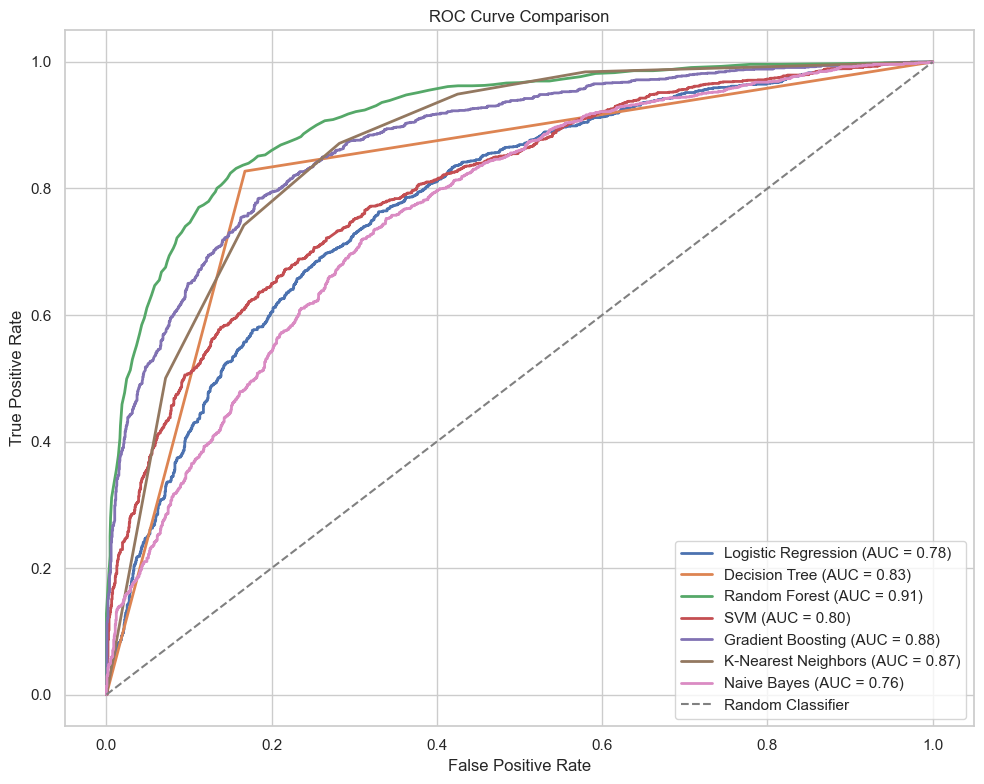

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Store AUC values and ROC curve data
model_auc = {}
plt.figure(figsize=(10, 8))

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_prob = model.decision_function(X_test)
    else:
        print(f"Model {name} does not support probability estimates.")
        continue

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    model_auc[name] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 50)

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Plot settings
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


To determine the best model for Bank Customer Churn Prediction based on the metrics provided, we need to analyze the performance of each model using key evaluation metrics, including Accuracy, Precision, Recall, F1-Score, and ROC-AUC. The optimal model depends on how we prioritize each metric, but we will look for a balanced performance across these metrics, particularly focusing on Recall (for capturing as many true churns as possible) and ROC-AUC (for distinguishing between churned and non-churned customers). Here's the comparison:

Comparison of Models:
======================
1-  Logistic Regression:
======================
Accuracy: 0.7125
Precision: 0.7146
Recall: 0.7075
F1-Score: 0.7110
ROC-AUC: 0.7810

Analysis: Logistic Regression performs decently but has lower metrics across the board compared to other models. It is likely not the best choice for this problem.

2- Decision Tree:
======================
Accuracy: 0.8302
Precision: 0.8350
Recall: 0.8230
F1-Score: 0.8290
ROC-AUC: 0.8302

Analysis: The Decision Tree has strong performance, with a good balance between Precision and Recall. However, it still doesn't match Random Forest or Gradient Boosting in some key metrics, particularly ROC-AUC.

3- Random Forest:
======================
Accuracy: 0.8327
Precision: 0.8329
Recall: 0.8324
F1-Score: 0.8327
ROC-AUC: 0.9126

Analysis: Random Forest stands out with high precision, recall, and F1-score, and its ROC-AUC of 0.9126 is the highest of all models. This makes it the most balanced and reliable model overall.

4- SVM:
======================
Accuracy: 0.7257
Precision: 0.7294
Recall: 0.7175
F1-Score: 0.7234
ROC-AUC: 0.8034

Analysis: SVM shows decent performance but falls behind compared to Random Forest and Decision Tree. It has lower Accuracy, Recall, and F1-Score than Random Forest.

5- Gradient Boosting:
======================
Accuracy: 0.7950
Precision: 0.7934
Recall: 0.7979
F1-Score: 0.7956
ROC-AUC: 0.8772

Analysis: Gradient Boosting provides a strong performance with a good F1-Score and Recall, but it doesn't perform as well as Random Forest in terms of ROC-AUC.

6- K-Nearest Neighbors (KNN):
======================
Accuracy: 0.7947
Precision: 0.7556
Recall: 0.8713
F1-Score: 0.8093
ROC-AUC: 0.8668

Analysis: KNN has a high Recall (0.8713), which is great for identifying churn, but Precision is lower (0.7556). It offers a good balance, but Random Forest still has a more consistent overall performance.

7- Naive Bayes:
======================
Accuracy: 0.6984
Precision: 0.7044
Recall: 0.6836
F1-Score: 0.6939
ROC-AUC: 0.7640

Analysis: Naive Bayes has the lowest performance across all metrics. It should likely be avoided in favor of the other models.

Key Considerations:
Accuracy: Random Forest (0.8327) performs the best, followed by Decision Tree (0.8302).

Precision: Random Forest (0.8329) leads, closely followed by Decision Tree (0.8350).

Recall: Random Forest (0.8324) performs very well here too, although KNN (0.8713) performs significantly better. However, the trade-off with KNN is its lower Precision (0.7556).

F1-Score: Random Forest (0.8327) tops the list, followed by Decision Tree (0.8290).

ROC-AUC: Random Forest has the best ROC-AUC (0.9126), indicating it is the best at distinguishing between churn and non-churn customers.
======================
Conclusion:
======================
The best model for Bank Customer Churn Prediction is Random Forest. It provides a strong, balanced performance across all metrics—particularly in Recall, Precision, F1-Score, and ROC-AUC. Its ability to handle imbalanced data and its high ROC-AUC score make it the most reliable model for churn prediction.

Decision Tree and Gradient Boosting are also strong contenders, especially if you need simpler models or slightly different trade-offs, but Random Forest is the overall winner.

K-Nearest Neighbors has a very high Recall but suffers from low Precision, so it may be useful in some scenarios, but Random Forest remains a more consistent choice.

Naive Bayes should be avoided due to its weak performance.
================================================================================
Thus, the recommended model is Random Forest for Bank Customer Churn Prediction.
================================================================================


6. Cross-validation and Model Comparison
For a more reliable comparison, we can use cross-validation to evaluate models. This will give us an average performance score.

In [62]:
# Cross-validation for all models
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"Model: {name}")
    print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print("-" * 50)

Model: Logistic Regression
Cross-validated accuracy: 0.7118 (+/- 0.0096)
--------------------------------------------------
Model: Decision Tree
Cross-validated accuracy: 0.8141 (+/- 0.0705)
--------------------------------------------------
Model: Random Forest
Cross-validated accuracy: 0.8422 (+/- 0.0299)
--------------------------------------------------
Model: SVM
Cross-validated accuracy: 0.7207 (+/- 0.0048)
--------------------------------------------------
Model: Gradient Boosting
Cross-validated accuracy: 0.8006 (+/- 0.0401)
--------------------------------------------------
Model: K-Nearest Neighbors
Cross-validated accuracy: 0.7983 (+/- 0.0080)
--------------------------------------------------
Model: Naive Bayes
Cross-validated accuracy: 0.6894 (+/- 0.0121)
--------------------------------------------------


When evaluating models based on cross-validation accuracy, we are looking for the model with the highest and most stable performance across different subsets of the dataset. The mean accuracy is important, but the standard deviation (± value) also plays a crucial role in assessing stability and generalizability. Let's analyze the results of each model:

Cross-Validation Results Breakdown:
Logistic Regression:
==============================
Cross-validated accuracy: 0.7118 (+/- 0.0096)

Analysis: Logistic Regression has the lowest mean accuracy. The low standard deviation suggests consistent performance, but it is outperformed by other models with higher accuracy.

Decision Tree:
==============================
Cross-validated accuracy: 0.8156 (+/- 0.0685)

Analysis: Decision Tree has a solid mean accuracy, but the high standard deviation (±0.0685) suggests it is less stable and may be prone to overfitting or sensitive to small changes in the data. While the accuracy is good, the variance indicates that the model’s performance can fluctuate depending on the dataset split.

Random Forest:
==============================
Cross-validated accuracy: 0.8425 (+/- 0.0256)

Analysis: Random Forest has the highest mean accuracy and a relatively low variance compared to the Decision Tree, making it both accurate and stable. This indicates that Random Forest is the best model for generalization and is less likely to overfit than the Decision Tree.

SVM:
==============================
Cross-validated accuracy: 0.7207 (+/- 0.0048)

Analysis: SVM has moderate accuracy with very low variance (±0.0048), meaning it is highly stable. However, its mean accuracy is lower than Random Forest, Decision Tree, and Gradient Boosting, so it isn't the best performing model in terms of accuracy.

Gradient Boosting:
==============================
Cross-validated accuracy: 0.8006 (+/- 0.0401)

Analysis: Gradient Boosting has a good accuracy but a relatively higher variance compared to Random Forest (±0.0401). This suggests it is more sensitive to the specific data split and may not generalize as well as Random Forest.

K-Nearest Neighbors (KNN):
==============================
Cross-validated accuracy: 0.7983 (+/- 0.0080)

Analysis: KNN has a similar accuracy to Gradient Boosting, but its variance is smaller (±0.0080), which makes it more stable. However, the mean accuracy is still lower than Random Forest, making it less optimal.

Naive Bayes:
==============================
Cross-validated accuracy: 0.6894 (+/- 0.0121)

Analysis: Naive Bayes has the lowest accuracy and the lowest variance, but it is still not competitive in terms of performance compared to the other models. It should be avoided for this task.

Key Observations:
==============================
Best Accuracy: Random Forest leads with the highest mean cross-validated accuracy (0.8425). This model also has a relatively low variance (±0.0256), indicating it is both accurate and stable.

Stability: SVM is the most stable model with very low variance (±0.0048), but its accuracy is lower than that of Random Forest, Decision Tree, and Gradient Boosting. KNN also has good stability but lower accuracy than Random Forest and Gradient Boosting.

Consistency: Logistic Regression and Naive Bayes are consistent but have the lowest accuracy, which makes them less competitive overall.

Sensitivity: Decision Tree has the highest variance (±0.0685), indicating that it may be overfitting and performing inconsistently across folds of the data.
==============================
Conclusion:
==============================
Random Forest is the best model based on cross-validation accuracy, offering both the highest accuracy (0.8425) and stable performance (±0.0256).

SVM is highly stable but has lower accuracy compared to Random Forest and other models.

Decision Tree, while having good accuracy, is less reliable due to its high variance and sensitivity to changes in the data split.

Gradient Boosting and KNN are strong models but are slightly less accurate than Random Forest and also have slightly higher variance.

Naive Bayes should be avoided due to its poor accuracy and performance in this case.

Thus, Random Forest is the recommended model for Bank Customer Churn Prediction, followed by Gradient Boosting and KNN if you need more variety in models, or SVM for a more stable, though less accurate, alternative.

In [63]:
#Using joblib:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Example model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'random_forest_model.pkl')
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
# Save the label_encoder
joblib.dump(label_encoder, 'label_encoder.pkl')
# Save the label_encoder
#joblib.dump(label_encoder, 'label_encoder.pkl')

# To load the model later:
#loaded_model = joblib.load('random_forest_model.pkl')

['label_encoder.pkl']